In [19]:
# Generate Sample
import numpy as np

def generate_data(N, p):
    x_values = np.random.uniform(-1, 1, N)
    y_values = np.sign(x_values)

    for i, y in enumerate(y_values):
        if (y == 0):
            y = -1
        if(np.random.rand() < p): # noise
            y_values[i] = -y

    return x_values, y_values

In [32]:
# Run decision stump learning algorithm
def decision_stump(x_values, y_values):
    x_values = np.sort(x_values)

    ein_s = 0
    ein_theta = 0
    min_error = len(x_values) + 1

    s_values = [-1, 1]
    theta_values = []
    theta_values.append(-1)
    for i in range(len(x_values) - 1):
        theta_values.append((x_values[i] + x_values[i + 1]) / 2)

    for s in s_values:
        for theta in theta_values:
            error = 0
            for x, y in zip(x_values, y_values):
                if s * np.sign(x - theta) != y:
                    error += 1
            # print("s: ", s, "theta: ", theta, "error: ", error)
            if error < min_error or (error == min_error and s * theta < ein_s * ein_theta):
                min_error = error
                ein_s = s
                ein_theta = theta

    ein = min_error / len(x_values)

    return ein, ein_s, ein_theta

def decision_stump_random(x_values, y_values):
    x_values = np.sort(x_values)

    ein_s = np.random.choice([-1, 1])
    ein_theta = np.random.uniform(-1, 1)

    error = 0
    for x, y in zip(x_values, y_values):
        if ein_s * np.sign(x - ein_theta) != y:
            error += 1

    ein = error / len(x_values)

    return ein, ein_s, ein_theta

def compute_eout(ein_s, ein_theta, p):
    v = ein_s * (0.5 - p)
    eout = 0.5 - v + v * abs(ein_theta)
    return eout

[0] eout: 0.16037713118454766
[1] eout: 0.525009460079219
[2] eout: 0.18227722422155793
[3] eout: 0.39327309140771594
[4] eout: 0.5
[5] eout: 0.8104470303811927
[6] eout: 0.6337369522864746
[7] eout: 0.5298101400522206
[8] eout: 0.18032532008997199
[9] eout: 0.2708930054905482
[10] eout: 0.8452079625008866
[11] eout: 0.2578120321112426
[12] eout: 0.7391637068247028
[13] eout: 0.21895362851241135
[14] eout: 0.4083907381912436
[15] eout: 0.23461074250764324
[16] eout: 0.22335352200705783
[17] eout: 0.4248184262481981
[18] eout: 0.48818599152803005
[19] eout: 0.21933776602774827
[20] eout: 0.5313641142552088
[21] eout: 0.1933419526371173
[22] eout: 0.5
[23] eout: 0.8249876501355525
[24] eout: 0.6784917814034881
[25] eout: 0.7204837253142597
[26] eout: 0.176813704163714
[27] eout: 0.38486949915851254
[28] eout: 0.30174544518349755
[29] eout: 0.24931992161522734
[30] eout: 0.7925612334243327
[31] eout: 0.697888863164709
[32] eout: 0.5555925243407478
[33] eout: 0.23897608426704323
[34] eout:

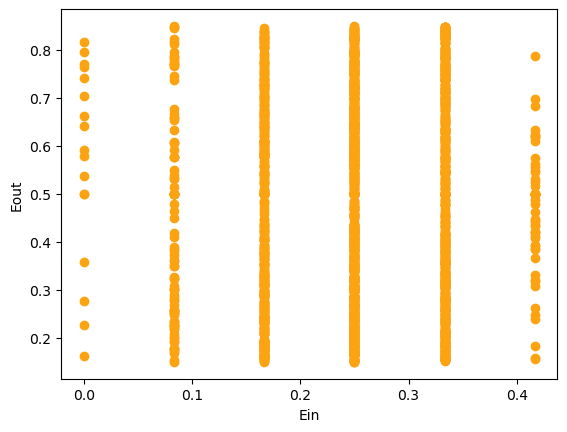

In [44]:
# Problem 11
p = 0.15

ein_list = []
eout_list = []
deviation_list = []

for i in range(2000):
    x_values, y_values = generate_data(12, p)
    ein, ein_s, ein_theta = decision_stump(x_values, y_values)
    eout = compute_eout(ein_s, ein_theta, p)

    print(f"[{i}] eout: {eout}")

    ein_list.append(ein)
    eout_list.append(eout)
    deviation_list.append(eout - ein)

print("deviation median: ", np.median(deviation_list))

# Plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(ein_list, eout_list, color='#fca311')
plt.xlabel("Ein")
plt.ylabel("Eout")
plt.savefig(f'p11-scatter.png')
plt.show()
plt.close()

[0] eout: 0.8342370109526749
[1] eout: 0.444967028248545
[2] eout: 0.19352917275327264
[3] eout: 0.5627116341614695
[4] eout: 0.49344271620254754
[5] eout: 0.25681488310625217
[6] eout: 0.7447809663073183
[7] eout: 0.2177923938128085
[8] eout: 0.6707254002790353
[9] eout: 0.4864945942650076
[10] eout: 0.5609165604697111
[11] eout: 0.44184629447525364
[12] eout: 0.7182334848042796
[13] eout: 0.5469585245719699
[14] eout: 0.21336542918629275
[15] eout: 0.8484944274008828
[16] eout: 0.8229129827689072
[17] eout: 0.6550219618076835
[18] eout: 0.6809433621057681
[19] eout: 0.7468697526617138
[20] eout: 0.8149301364149838
[21] eout: 0.7170898631172047
[22] eout: 0.17811170255990508
[23] eout: 0.48516826583577516
[24] eout: 0.25045544453016994
[25] eout: 0.44203927902897483
[26] eout: 0.1627518485276021
[27] eout: 0.8371785240240353
[28] eout: 0.757077953579165
[29] eout: 0.4737279931209901
[30] eout: 0.5152456558529082
[31] eout: 0.47914422093726333
[32] eout: 0.4442778717959174
[33] eout: 0

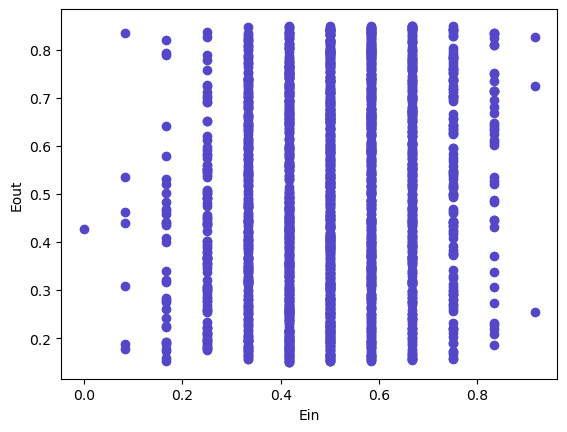

In [45]:
# Problem 12
p = 0.15

ein_list_rd = []
eout_list_rd = []
deviation_list_rd = []

for i in range(2000):
    x_values, y_values = generate_data(12, p)
    ein, ein_s, ein_theta = decision_stump_random(x_values, y_values)
    eout = compute_eout(ein_s, ein_theta, p)

    print(f"[{i}] eout: {eout}")

    ein_list_rd.append(ein)
    eout_list_rd.append(eout)
    deviation_list_rd.append(eout - ein)

print("deviation median: ", np.median(deviation_list_rd))

# Plot scatter plot
import matplotlib.pyplot as plt
plt.scatter(ein_list_rd, eout_list_rd, color='#5448C8')
plt.xlabel("Ein")
plt.ylabel("Eout")
plt.savefig(f'p12-scatter.png')
plt.show()
plt.close()

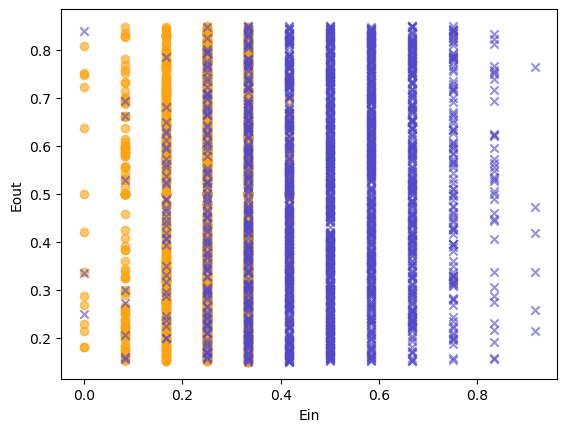

In [43]:
fig, ax = plt.subplots()
ax.scatter(ein_list, eout_list, marker="o", color='#fca311', alpha=0.6)
ax.scatter(ein_list_rd, eout_list_rd, marker="x", color='#5448C8', alpha=0.6)
plt.xlabel("Ein")
plt.ylabel("Eout")
plt.savefig(f'mix-scatter.png')
plt.show()
plt.close()